<a href="https://colab.research.google.com/github/Samuela31/Machine-Learning-Lab/blob/main/ML_Lab_8_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

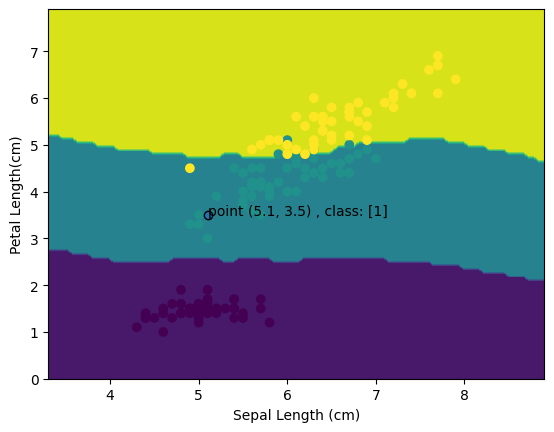

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Iris.csv")
print(df)

x = df[['SepalLengthCm','PetalLengthCm']].values #predictor variables
le = LabelEncoder()
y=le.fit_transform(df['Species']) #class

x1,y1=5.1, 3.5 #to be predicted

knn = KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x, y)

prediction = knn.predict([[x1,y1]])

DecisionBoundaryDisplay.from_estimator(model,x,response_method="predict")
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(x1,y1,edgecolors='black')
plt.text(x1, y1, s=f"point {x1,y1} , class: {prediction}")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length(cm)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#to find euclidian distance
#x and y are predictor variables
x=np.array(df["SepalLengthCm"])
y=np.array(df["PetalLengthCm"])

x1,y1=7.1, 5.5 #to be predicted
dist=[]

for i in range(len(x)):
  dist.append(np.sqrt((x1-x[i])**2 + (y1-y[i])**2))

dist=np.array(dist)

#appending Euclidian distance as new column
df["Euclidian distance"]=dist.tolist()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Euclidian distance
0,1,5.1,3.5,1.4,0.2,Iris-setosa,4.561798
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4.652956
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4.837355
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4.716991
4,5,5.0,3.6,1.4,0.2,Iris-setosa,4.606517
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.500000
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.943398
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.670820
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.905539


In [ ]:
#ranking based on Euclidian distance
newdf = df.sort_values(by="Euclidian distance")
newdf

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Euclidian distance
139,140,6.9,3.1,5.4,2.1,Iris-virginica,0.223607
120,121,6.9,3.2,5.7,2.3,Iris-virginica,0.282843
112,113,6.8,3.0,5.5,2.1,Iris-virginica,0.300000
129,130,7.2,3.0,5.8,1.6,Iris-virginica,0.316228
102,103,7.1,3.0,5.9,2.1,Iris-virginica,0.400000
...,...,...,...,...,...,...,...
41,42,4.5,2.3,1.3,0.3,Iris-setosa,4.939636
42,43,4.4,3.2,1.3,0.2,Iris-setosa,4.992995
38,39,4.4,3.0,1.3,0.2,Iris-setosa,4.992995
22,23,4.6,3.6,1.0,0.2,Iris-setosa,5.147815


In [ ]:
#predicting class
k=df["Species"].nunique() #assigning no. of classes as K value
print("K value is:",k)

p=newdf.head(k)
print(p) #getting first k rows of sorted dataframe

K value is: 3
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
139  140            6.9           3.1            5.4           2.1   
120  121            6.9           3.2            5.7           2.3   
112  113            6.8           3.0            5.5           2.1   

            Species  Euclidian distance  
139  Iris-virginica            0.223607  
120  Iris-virginica            0.282843  
112  Iris-virginica            0.300000  


The class label of data where SepalLengthCm= 7.1 and PetalLengthCm= 5.5 is: Iris-virginica


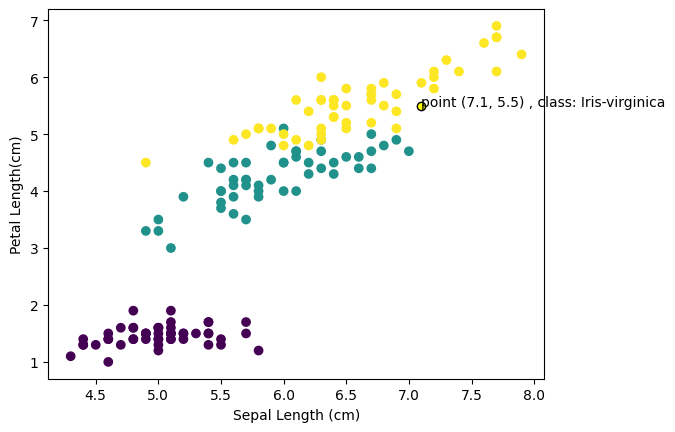

In [ ]:
a=np.array(p["Species"].mode())
print("The class label of data where SepalLengthCm= {} and PetalLengthCm= {} is:".format(x1,y1),a[0])

le = LabelEncoder()
cl=le.fit_transform(df['Species'])
plt.scatter(x, y, c=cl)
plt.scatter(x1,y1,c='yellow',edgecolors='black')
plt.text(x1, y1, s=f"point {x1,y1} , class: {a[0]}")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length(cm)')
plt.show()